In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal
import graphviz



In [2]:
df = pd.read_csv('Project Dataset/previous_application.csv')
df.head(150)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1375746,227908,Revolving loans,2250.000,0.0,45000.0,NaN,NaN,SATURDAY,19,...,Consumer electronics,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
146,2241359,127285,Consumer loans,8586.180,48600.0,48600.0,0.0,48600.0,WEDNESDAY,9,...,Consumer electronics,6.0,low_normal,POS household with interest,365243.0,-464.0,-314.0,-314.0,-309.0,0.0
147,1003555,195690,Cash loans,24703.335,337500.0,422496.0,NaN,337500.0,MONDAY,15,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-820.0,-130.0,-760.0,-753.0,1.0
148,2021594,131649,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,12,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check the shape of the dataset
df.shape

(1670214, 37)

In [4]:
# check for null
df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [5]:
# check how many duplicated row in the dataset
df.duplicated().sum()

0

In [6]:
# drop the cancled loan application cuz it does not make any contribution to our reseach topic
# and mark Approved and Unused offers as approved since they got accepted
# and mark Refused loan as 0
df['NAME_CONTRACT_STATUS'].replace('Approved', 1)
df['NAME_CONTRACT_STATUS'].replace('Refused', 0)
df['NAME_CONTRACT_STATUS'].replace('Unused offer', 1)
df.drop(df[df['NAME_CONTRACT_STATUS'] =='Canceled'].index, inplace = True)


In [7]:
#since we are not yet interested in the reject reason, drop it for now
df.drop(columns=['CODE_REJECT_REASON'])
# we are not interested in how approved loan is paid back now, drop it
df.drop(columns=['NAME_PAYMENT_TYPE'])

df.drop(columns=['SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','CNT_PAYMENT','DAYS_FIRST_DRAWING',
                'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION'])

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,middle,POS mobile with interest,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,low_action,Cash X-Sell: low,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,high,Cash X-Sell: high,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,middle,Cash X-Sell: middle,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,high,Cash Street: high,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,low_normal,POS industry with interest,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,middle,POS industry with interest,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,low_normal,POS household with interest,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),low_normal,Cash X-Sell: low,1.0


In [8]:
# check if the Canceled loan still exist
df['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [9]:
# check the shape of the dataset again, obviously, the canceled data is dropped
df.shape

(1353895, 37)

In [10]:
# convert text type data into numerical data
df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
                                 'NAME_CASH_LOAN_PURPOSE','NAME_TYPE_SUITE','NAME_CLIENT_TYPE',
                                'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
                                'CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NFLAG_INSURED_ON_APPROVAL'], drop_first=True)

In [11]:
df.isnull().sum()

SK_ID_PREV                                             0
SK_ID_CURR                                             0
AMT_ANNUITY                                        66430
AMT_APPLICATION                                        0
AMT_CREDIT                                             1
                                                   ...  
PRODUCT_COMBINATION_POS mobile with interest           0
PRODUCT_COMBINATION_POS mobile without interest        0
PRODUCT_COMBINATION_POS other with interest            0
PRODUCT_COMBINATION_POS others without interest        0
NFLAG_INSURED_ON_APPROVAL_1.0                          0
Length: 128, dtype: int64

In [12]:
df.head(20)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,NFLAG_INSURED_ON_APPROVAL_1.0
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.000000,...,0,0,0,0,0,1,0,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,1
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,1
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,1,0,0,0,0,0,0,0,0,1
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,0,0,0,0,0,0,0,0,0,0
5,1383531,199383,23703.930,315000.0,340573.5,NaN,315000.0,8,1,NaN,...,0,0,0,0,0,0,0,0,0,1
10,1715995,447712,11368.620,270000.0,335754.0,NaN,270000.0,7,1,NaN,...,0,0,0,0,0,0,0,0,0,1
11,2257824,161140,13832.775,211500.0,246397.5,NaN,211500.0,10,1,NaN,...,1,0,0,0,0,0,0,0,0,1
12,2330894,258628,12165.210,148500.0,174361.5,NaN,148500.0,15,1,NaN,...,0,0,0,0,0,0,0,0,0,1
13,1397919,321676,7654.860,53779.5,57564.0,0.0,53779.5,15,1,0.000000,...,0,0,1,0,0,0,0,0,0,1


In [13]:
# get the average annuity of approved applications and refused applications
average_approved_AMT_ANNUITY=(df[(df['NAME_CONTRACT_STATUS']==1)])['AMT_ANNUITY'].mean()
average_Refused_ANNUITY=(df[(df['NAME_CONTRACT_STATUS']==0)])['AMT_ANNUITY'].mean()
print("the average annuity of approved applications is ", average_approved_AMT_ANNUITY)
print("the average annuity of refused applications is ", average_Refused_ANNUITY)

the average annuity of approved applications is  nan
the average annuity of refused applications is  nan


In [14]:
#it seems like we have to fill something into the null values
#some AMT_ANNUITY is empty, I will replace the the average AMT_ANNUITY based on its NAME_CONTRACT_STATUS

df['AMT_ANNUITY'] = np.where(((df['AMT_ANNUITY']=='nan') & (df['NAME_CONTRACT_STATUS'] == 1) ), average_approved_AMT_ANNUITY,df['AMT_ANNUITY'] )
df['AMT_ANNUITY'] = np.where(((df['AMT_ANNUITY']=='nan') & (df['NAME_CONTRACT_STATUS'] == 0) ), average_Refused_ANNUITY,df['AMT_ANNUITY'] )

In [23]:
df.head(50)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,NFLAG_INSURED_ON_APPROVAL_1.0
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.000000,...,0,0,0,0,0,1,0,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,1
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,1
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,1,0,0,0,0,0,0,0,0,1
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,0,0,0,0,0,0,0,0,0,0
5,1383531,199383,23703.930,315000.0,340573.5,NaN,315000.0,8,1,NaN,...,0,0,0,0,0,0,0,0,0,1
10,1715995,447712,11368.620,270000.0,335754.0,NaN,270000.0,7,1,NaN,...,0,0,0,0,0,0,0,0,0,1
11,2257824,161140,13832.775,211500.0,246397.5,NaN,211500.0,10,1,NaN,...,1,0,0,0,0,0,0,0,0,1
12,2330894,258628,12165.210,148500.0,174361.5,NaN,148500.0,15,1,NaN,...,0,0,0,0,0,0,0,0,0,1
13,1397919,321676,7654.860,53779.5,57564.0,0.0,53779.5,15,1,0.000000,...,0,0,1,0,0,0,0,0,0,1


In [19]:
#How many types of contract type are there?
data =  pd.read_csv('Project Dataset/previous_application.csv')
names = data.groupby('NAME_CONTRACT_TYPE').sum()
names.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
Cash loans,1448721871454,208072440468,1.205594e+10,2.053980e+11,2.273021e+11,0.000000e+00,2.053980e+11,8961777,747147,0.000000,...,0.000000,-427462646,9503290,13085528.0,1.054752e+11,-8.223930e+07,-4.488658e+07,2.535641e+10,2.574078e+10,231298.0
Consumer loans,1390079803928,202965060796,7.002854e+09,6.838549e+10,6.673525e+10,5.178458e+09,6.838549e+10,9505948,728870,61559.277501,...,4603.113636,-911122522,484693354,7752413.0,2.244798e+11,1.775822e+09,-5.284297e+08,2.555406e+10,2.649551e+10,99717.0
Revolving loans,372502553723,53784958985,1.650613e+09,1.889458e+10,3.351486e+10,7.809670e+06,1.893170e+10,2379111,187951,109.083262,...,0.000000,-132194584,30153081,0.0,1.127918e+10,1.209327e+10,3.424482e+10,2.545360e+10,2.952229e+10,607.0
XNA,666167972,93588931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4419,346,0.000000,...,0.000000,-143759,15823,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


In [20]:
payment = ['AMT_DOWN_PAYMENT','AMT_GOODS_PRICE'] #Dowm Payment 
#Mean of down_payment
dataset = data.groupby('NAME_CONTRACT_TYPE')[payment].mean() 
#dataset.head()

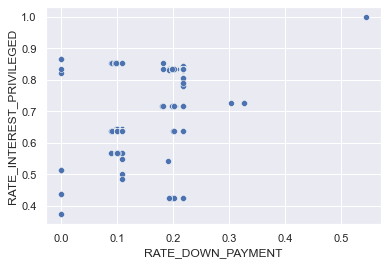

In [22]:
#RATE DOWN PAYMENT VS RATE_INTEREST_PRIVILEGED (Scatter Plot)
Rate_Down_Payment = sns.scatterplot(data=data, x="RATE_DOWN_PAYMENT", y="RATE_INTEREST_PRIVILEGED")